In [2]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot

#  Reading time series
from pandas_datareader import data

import pandas_ta as ta

import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Stationarity
import statsmodels.api as sm
import statsmodels.tsa as tsa

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [3]:
#  Start and End Date
start = datetime.date(2016, 4, 10)
end = datetime.date(2019, 4, 10)

#  Assign a database with historical stock quotes from Yahoo! Finance to CSCO
#  Cisco Systems, Inc.
CSCO = data.get_data_yahoo('CSCO', start, end)
CSCO_closing_prices = pd.DataFrame()
CSCO_closing_prices['Adj Close'] = CSCO['Adj Close']
CSCO_closing_prices['Date'] = CSCO_closing_prices.index
CSCO_closing_prices.set_index('Date')
#CSCO_closing_prices['Date'] = CSCO_closing_prices.index
CSCO_percent_change = CSCO_closing_prices['Adj Close'].pct_change()


## Exponential Smoothing: Finding optimal Smoothing Factor (α)

A smoothing factor's closer to one have less of smoothing effect and give greater weight to recent changes
in the data (when α = 1, it becomes the observation). While values closer to zero have a greater smoothing effect 
and are less responsive to recent changes. α is the "memory" of the estimator.

The smoothing factors tested for optimization are α = .120, .125, .130, .135, .140 
(Narrowed down from last part)

In [4]:
CSCO_closing_prices['ES α = .120'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.120).mean()
CSCO_closing_prices['ES α = .125'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.125).mean()
CSCO_closing_prices['ES α = .130'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.130).mean()
CSCO_closing_prices['ES α = .135'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.135).mean()
CSCO_closing_prices['ES α = .140'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.140).mean()
CSCO_closing_prices['ES α = .145'] = CSCO_closing_prices['Adj Close'].ewm(alpha=0.145).mean()
CSCO_closing_prices['ES α = .80'] = CSCO_closing_prices['Adj Close'].ewm(alpha=.80).mean()


Graphically visualize the smoothing factors

/home/trevor/anaconda3/envs/CS4315/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


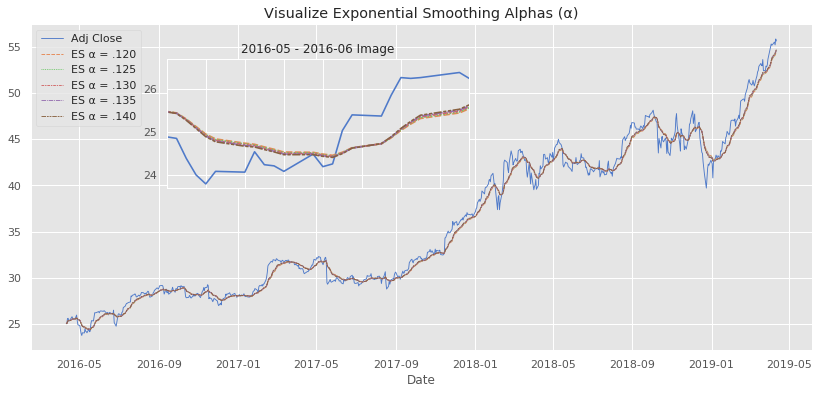

In [5]:
#  Specify matplotlob Figure and Axes
sns.set(rc={"lines.linewidth": 0.9})
plt.style.use('ggplot')
figsize_1 = (14, 6)
figure_1, ax_1 = plt.subplots(figsize=figsize_1)
palette = sns.color_palette('muted', n_colors=6, desat=.9)
ax_1.set_title('Visualize Exponential Smoothing Alphas (α)')

sns.lineplot(data=CSCO_closing_prices[['Adj Close', 'ES α = .120', 'ES α = .125', 'ES α = .130', 
                                       'ES α = .135', 'ES α = .140',]],
             legend='full',
             palette=palette,
             hue=['Adj Close', 'ES α = .120', 'ES α = .125', 'ES α = .130', 'ES α = .135', 'ES α = .140',],
             ax=ax_1,
             err_style='bars'
             )

ax2 = plt.axes([0.26, 0.5, .3, .3])
plt.tick_params(
    axis='x',
    labelbottom=False
)
sns.set(rc={"lines.linewidth": 1.6})
sns.lineplot(data=CSCO_closing_prices[['Adj Close', 'ES α = .120', 'ES α = .125', 'ES α = .130', 
                                       'ES α = .135', 'ES α = .140',]],
             palette=palette,
             legend=False,
            ax=ax2)
ax2.set_title('2016-05 - 2016-06 Image')
ax2.set_xlim(left='2016-05', right='2016-06')
ax2.set_ybound(23.7, 26.7)


##### Checking Exponential Smoothing Model Accuracy with Mean Squared Error and Mean Absolute Error
It looks like the best exponential smoothing model is around ES α = .12 - .14. The alpha value is low
because the more observations in the dataset, the lower the optimal alpha value is. ES α = .1 is 
probably too low and will smooth the data too much.

We will use α = .130 for the predictive dataset.  

In [6]:
MSE = ['ES α = 0', 'ES α = .99', 'ES α = .130', 'ES α = .135', 'ES α = .140', 'ES α = .145']
MSE[0] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = 0'])
MSE[1] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .99'])
MSE[2] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .130'])
MSE[3] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .135'])
MSE[4] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .140'])
MSE[5] = mean_squared_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .145'])
MSE

KeyError: 'ES α = 0'

In [7]:
MAE = ['ES α = .120', 'ES α = .125', 'ES α = .130', 'ES α = .135', 'ES α = .140', 'ES α = .145']
MAE[0] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .120'])
MAE[1] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .125'])
MAE[2] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .130'])
MAE[3] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .135'])
MAE[4] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .140'])
MAE[5] = mean_absolute_error(CSCO_closing_prices['Adj Close'], CSCO_closing_prices['ES α = .145'])
MAE


[0.6771515884455611,
 0.658799123758096,
 0.6413708213603684,
 0.6247476192940888,
 0.6090516030863499,
 0.5941378598351815]

In [8]:
CSCO.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-11,55.950001,55.310001,55.93,55.599998,13186000.0,55.599998


In [18]:
CSCO_processed = CSCO.ewm(alpha = .130).mean()
# CSCO_processed['Date'] = CSCO_processed.index
# CSCO_processed.set_index('Date')
CSCO_processed.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-11,54.977179,54.283772,54.592905,54.709012,1.665225e+07,54.562375


# Feature Extraction
---------
Possibly use pyti?

Relative Strength Index
Stochastic Oscillator
Williams %R
Moving Average Convergence Divergence
Price Rate of Change
On Balance Volume

## Relative Strength Index (RSI)
Type of momentum indicator

The RSI is a calculated ratio of the recent upward price movements to the absolute price movement.
The RSI ranges from 0 to 100. It's interpreted as an overbought indicator 
when the value is over 70, and an oversold indicator when the value is below 30.

This will give our categorical attribute three values?  

RSI(Series, Period)
The period is the number of observations the indicator will go back to. The default
that most traders use is 14


In [98]:
CSCO_processed['RSI'] = CSCO_processed.ta.rsi(close='Adj Close') 
CSCO_processed['RSI'].tail()


Date
2019-04-05    98.891434
2019-04-08    98.975667
2019-04-09    99.029609
2019-04-10    99.102339
2019-04-11    99.152337
Name: RSI, dtype: float64

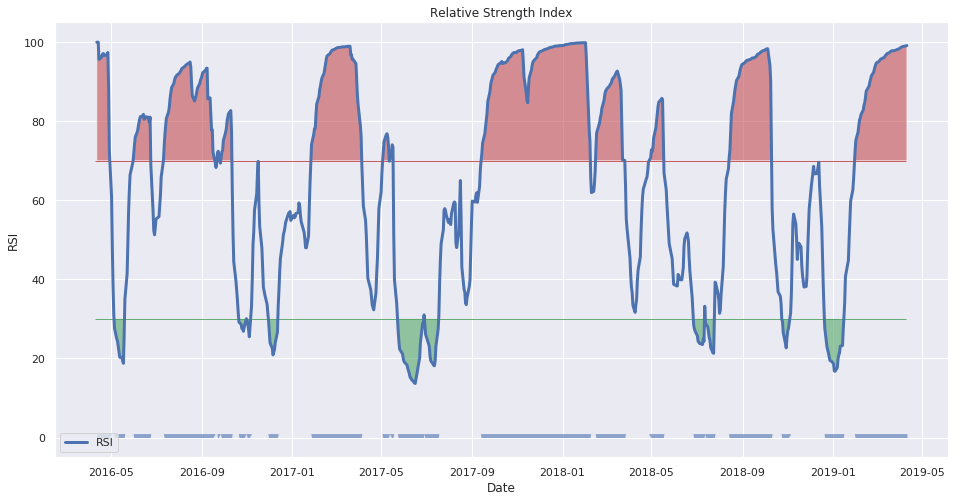

In [132]:
sns.set(rc={"lines.linewidth": 0.9})
figsize_2 = (16, 8)
figure_2, ax_2 = plt.subplots(figsize=figsize_2)
palette_2 = sns.color_palette('Blues', n_colors=1, desat=.9)
ax_2.set_title('Relative Strength Index')

RSI_line = sns.lineplot(x=CSCO_processed.index, y=CSCO_processed['RSI'], legend='full', 
                        palette=['b'],
                        lw=3,
                        label='RSI')
RSI_line.hlines(70, start, end, linestyles='-', colors='r', label='overbought')
RSI_line.hlines(30, start, end, linestyles='-', colors='g', label='oversold')
RSI_line.hlines(30, start, end, linestyles='-', colors='b', linewidth=0)
RSI_line.fill_between(CSCO_processed.index, CSCO_processed['RSI'], 70, where=CSCO_processed['RSI']>70,
                      interpolate=True,
                      alpha=0.6,
                      facecolor='r',
                      label='overbought')
RSI_line.fill_between(CSCO_processed.index, CSCO_processed['RSI']<70, CSCO_processed['RSI']>30,
                      alpha=.6,
                      facecolor='b',
                      linewidth=0,
                      label='unidentified')
RSI_line.fill_between(CSCO_processed.index, CSCO_processed['RSI'], 30, where=CSCO_processed['RSI']<30,
                      interpolate=True,
                      alpha=0.6,
                      facecolor='g',
                      linewidth=0,
                      label='oversold')


In [173]:
CSCO_classes = CSCO_processed
CSCO_classes.drop(labels=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)
random=2


Turn RSI into categorical data

In [164]:
def rsi_categorical(x):
    if 0 < x <= 30:
        return 'oversold'
    elif 30 < x < 70:
        return 'unknown'
    return 'overbought'



In [178]:
CSCO_classes['RSI'] = CSCO_classes['RSI'].apply(rsi_categorical)

TypeError: '<' not supported between instances of 'int' and 'str'

In [188]:
CSCO_classes['RSI'].value_counts()

overbought    384
unknown       265
oversold      108
Name: RSI, dtype: int64

## Williams Percentage Range (Williams %R)
**overbought:** a security that analyst or traders believe is trading above intrinsic value
**oversold:** condition where an asset has traded lower in price and has the potential for
a price bounce. 

Overbought means the price is near the highs of its recent range, oversold means the price is 
at the lower end of its recent range. 

A type of momentum indicator which measures overbought and oversold levels. It moves
between 0 and -100. A reading above -20 is overbought. A reading below -80 is oversold.

Compares a stock's closing price to the high-low range over a specified period, usually 14 days
 
       Highest - Close
    = ------------------ * -100
      Highest - Lowest

Highest is the highest price in look back period, 
Close is the most recent closing price, 
Lowest is the lowest price in the look back period


In [134]:
#help(pd.DataFrame().ta)

In [133]:
#help(ta.rsi)